# Random Forests
### Hvad er det, hvorfor er det og hvad foregår der?

![RT](https://images.boredomfiles.com/wp-content/uploads/2017/08/tree-3-e1503676886163-768x419.jpg)

"Random Forests" er en del af de usuperviserede algoritmer der bruges til f.eks. at klassificere "ting".

Så, hvad er klassificering? Klassificering er et begreb appliceret til de algoritmer der er designet til at *"se"* på ting og bestemme hvad de er.

![horse](https://i.pinimg.com/736x/10/5e/47/105e476496fbd538090c7daeb529c3bf.jpg)

Så hvor ser vi klassificering? Alle steder!

Amazon prøver at sælge jer til? Klassificering! Lufthavne scanner ting? Klassificering! Instagram censurerer billeder? You guess it... klassificering!

Fordelen ved klassificeringsalgoritmer er, at det sparer uendelig meget tid. Det kan grovsortere, det kan indfange og det kan hjælpe til, at vi ikke længere behøver, manuelt, at forholde os til samtlige elementer af generelt super kedelige ting. Hvem gider i virkeligheden kigge på kartofler hele dagen:

![potato](https://forbo.blob.core.windows.net/forbodocuments/507685/HD-Potato%20quality%20control%20at%20Avico.jpg)

I rå produktion er klassificering for alvor en opgradering (hvis vi ikke tager diskussionen om elimineringen af jobs op).

Kvalitetssikring er næsten 100% reduceret til klassificering nu, hvor selv folk hjemme i deres garage kan bygge en simpel maskine der sparer en del tid:

https://www.youtube.com/watch?v=A29IqeahI84



In short; klassificering er implementeret vildt mange steder, men hvordan kan det hjælpe os? Hvad har kartofler at gøre med socialvidenskab?

***More than you know, young Skywalker!***

Vi kan inddele klassificering brugt i samfundsvidenskab (meget groft) i to overordnede parametre: 

* Klassificering brugt til at sige noget om fordelinger
* Klassificering brugt til at prædiktere "hændelser"

Vi skal i dag primært kigge på klassificering til at prædiktere hændelser - nærmere betegnet skal vi kigge på, om vi kan prædiktere risiko for depression/angst i ukendt data ved at træne på data der allerede har labels.



#### Begreber vi helt sikkert skal have styr på, før vi kaster os ud i skovene:

* Decision trees 
* Bagging
* Test og træningssæt



## Decision trees

***Decision trees*** er en måde at håndtere data der består af en række valg på:

![dt](https://cdn-images-1.medium.com/max/824/0*J2l5dvJ2jqRwGDfG.png)

Et enkelt træ bygger på ideen om, at vi vil vide, hvor meget information hver gren af træet tilføjer vores endelige beslutning når vi skal bestemme noget. Som eksempel vil vi gerne vide, hvor meget følgende ting hjælper os til at forstå, om vi får en god dag i morgen:

|Solskin|Søvn dagen før|Marmorkugler i køleskabet|
|-------|--------------|-------------------------|
|Ja/Nej|Ja/Nej   |          Ja/Nej|

I ovenstående eksempel kan vi nok godt regne med, at søvn dagen før er ret vigtig, vejr er relativt vigtigt og hvorvidt vi har marmorkugler i køleskabet er meget lidt vigtigt (med mindre det er det eneste vi har - så er det nok ret vigtigt).

Vi kan ikke orke at skulle regne det hele ud, så i stedet applicerer vi noget der kaldes ***Shannon's Entropy***:

$$\LARGE H(X)=\sum^n_{{i=1}} p(x_i)ln \frac{1}{p(x_i)}$$

* $p(x_i)$ = andelen af populationen ($x$) der falder i en bestemt kategori ($i$)
* $ln$ = den naturlige logaritme
* $\sum^n_{{i=1}}$ = summering af det totale

Hvad betyder det i praksis? Det betyder at vi reelt set måler på, hvor meget information vi har af den totale information i den andel vi kigger på.

I vores eksempel vil vi gerne vide, hvor meget henholdvis solskin, søvn og marmorkugler hjælper os med den samlede information, som er om vi får en god dag. Hver af de elementer "tilbyder" en procentvis information til det fulde billede vil et decision tree hælde til at vælge den "gren" der fortæller os mest om, hvordan i morgen bliver. På den måde vil træet vide, hvad det skal kigge på og hvornår noget hælder til "god dag".

Shannons entropy er måske lidt irriterende at kigge på, men den er intuitiv let af forholde sig til hvis vi ser på den i forhold til biologi og særligt i forhold til artsdiversitet. Biologer bruger f.eks. $H$ til at sige noget om, hvor mange arter der eksisterer i et givent miljø (tænk "isoleret ø" og "hvor mange forskellige slags dyr"). Den her version af $H$ er "låst" mellem 0 og 1. I vores ø-eksempel betyder det, at:

* 1=fuld diversitet - alle arterne fyder lige meget
* 0=der er kun én art

Tænkt i vores eksempel kan vi overføre det til, hvorvidt hver gren på vores træ indeholder al informationen til at vide, om det bliver en god dag eller ikke noget som helst. Hvordan ved modellen, at informationen fører fra f.eks. solskin -> god dag? Den kigger! Det betyder, at den allerede har informationen (eller i hvert fald for en del af data) om hvorvidt der var solskin, om folk sov dagen før og om der er marmorkugler i køleskabet. Mere om det senere.

Entropien er en *hjælper* - det sker automatisk i modellerne og vi behøver ikke regne det ud :)

## Bagging

![bag](https://www.cmbiomass.com/wp-content/uploads/2018/07/bagging-operation-banner-1-1198x425.jpg)
.... ikke den slags bagging. Den her slags:

![real_bag](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/1920px-Ensemble_Bagging.svg.png)

Vi nærmer os langsomt en skov... bagging (også kaldet bootstrap aggregering) baserer sig på flere forskellige træer og ikke bare et. Normalt bygger vi et decision tree op omkring al information omkring det samme træ; vi samler, med andre ord, alt det vi kan for at tage én stor beslutning i ét træ. Bagging er næste skridt.

Ved bagging deler vi samplet op i tilfældige grupper, bygger træer og tester så, hvilke kombinationer af baggrundsvariable (solskin, søvn og marmorkugler) der resulterer i en god dag.

Hvorfor er træet ikke nok? Fordi træet egentlig bare stiller spørgsmålet til alle mennesker på én gang. Den tester forskellige kombinationer af variable til at få det rigtige svar, men det er altid bare med alle vores respondenter på én gang. Grunden til vi er bekymret for det er, at det kommer til at lære vores datasæt ekstremt godt (fordi det hele tiden har hele samplet), men det kommer til at klare sig markant dårligere når der kommer "ny" information ind. Vi vil helst have, at den kan lave analyser på mere data end det vi har... for der kender vi jo allerede svaret på, om folk får en god dag.

Bagging deler menneskerne op i forskellige grupper (træer) og forsøger at svare på samme spørgsmål; god dag? På den måde tvinger man konstant de forskellige grupper af mennesker (og deres tilhørende træer) til at blive en lille smule forskellige. Gruppe 1 har måske brug for lidt mere solskin, mens gruppe 2 er meget afhængige af søvn, osv.

Når vi har "nok" forskellige vil modellen prøve at lave en form for aggregat af træerne og så komme med en brugbar model.

## Train/test split

Nu har vi en generel ide om, hvordan de indledende øvelser til random forests fungerer, men vi mangler et helt essentielt skridt på vejen; train/test-split data. Et helt generelt problem i superviseret machine learning er, at de lærer for meget for hurtigt. Hvorfor er det et problem?

Lad os sige, at det vi beder modellen kigge på, er hvorvidt noget er en melon eller... ikke en melon. Vi viser den en masse billeder vi har fundet af meloner og så billeder af ting der ikke er meloner... f.eks. hvaler, rumskibe og Flemming fra grillen. Vi har ikke tænkt os helt vildt godt om da vi fandt billeder af meloner, så vi har primært bare fundet dem Rema sælger. De har vand-, net- og honningmeloner men de har ikke lige Galiameloner på lager. Ydermere finder vi mest bare billeder af meloner som de ser ud i reklamner. Pludselig beder vi modellen om at kigge på den her:

![rottenmelon](http://ransborons.scoilnet.ie/blog/files/2010/11/P1000178-300x225.jpg)

Den er rådden, underlig og klam og ligner slet ikke de meloner der er i reklamerne. Modellen skal kun forholde sig til, om det er en melon eller ikke en melon og det vi viser den nu er mega meget ikke noget den har set før. Den bliver stresset og tænker: "Det bliver et stor nej herfra" og smider den i bunken med hvaler, rumskibe og Flemming. Hvorfor? Fordi vi ikke har trænet den generelt men i stedet ekstremt specifikt. Hvis vi KUN træner modellen til at forudsige de ting vi allerede har vist den så er den i virkeligheden super dum - den gentager det vi allerede ved. Vi har brug for, at den husker alt fra meget specifikke detaljer til meget generelle ting som resulterer i at den i langt højere grad kan sige noget om ting den aldrig har set.

Opgaven bliver derfor, at tvinge modellen ikke til KUN at lære alt om præcis hvad vi giver den. Hvordan holder vi øje med, at det er det der sker? You guessed it; train/test-split! Hurtig visualisering:

![tt-split](https://miro.medium.com/max/656/0*FKrWuLRbB_MiEIKh)

Basalt set indeholder al vores data stadig de rigtige svar. Alle billederne af meloner har en "label" der hedder melon eller ikke melon. Nu har vi bare været smarte - vi "gemmer" noget af data for modellen som vi siger til den, at den faktisk slet ikke må kigge på. Det er hemmeligt. Ratioerne for hvad man træner på og hvad man gemmer væk varierer, men for det meste vil i se 90%-10%, 80%-20% eller 70%-30%. Når den så har trænet på f.eks. de 80% og fundet ud af, hvad den skal kigge på for at det virker der, så beder vi den om at tage den model og prøve den af på test-sættet, de sidste 20%. Hvis den har lært noget ekstremt specifikt på de 80% vil den klare sig elendigt på de sidste 20%. Hvis den har lært noget generelt og brugbart, så vil forskellen på test og træning være meget lille.




# BOOM!

Vi har nu al den information vi har brug for, før vi begynder at lege med tilfældige skove. Let's get to it!

Lad os importere ting... først i vores script som fornuftige mennesker! Den samme slags mennesker, der (selvfølgelig) putter toiletpapiret på holderen den rigtige vej.

In [42]:
import pandas as pd                                         #pandas stuff
from sklearn.model_selection import train_test_split        #Den dingenot der splitter data op på den "rigtige" måde
from sklearn.ensemble import RandomForestClassifier         #En del af sklearn der har random forests i sig
import numpy as np                                          #Numpy
from sklearn import metrics                                 #Til at måle hvor godt vores skov klarer sig
from sklearn.inspection import permutation_importance       #Til at forsøge at finde ud af, hvad der er vigtigt i modellen af de ting vi serverer den
from matplotlib import pyplot as plt                        #matplotlib fordi jeg er virkelig elendig til seaborn

Før vi i det hele taget gør andet, så lad os gøre os bekendt med data. Data er scramblet sundhedsprofil-data (rigtig data jeg har lavet pjatværk med). Variablene inkluderet er følgende:

![data](https://i.ibb.co/0y4p2fH/hep-data.png)

Lad os få proppet data ind:

In [43]:
dep = pd.read_csv("https://github.com/RolfLund/NDSM/raw/main/hep_snit.csv", low_memory=False)
dep.head()

,sp3,angstdep,sp13d,sp13e,sp17,sp60a,sp60b,sp60c,sp60d,sp60e,...,sp63a,sp63b,sp69,sp75,alder,binge,nybmi,samliv,nyudd,kon
0,3,1,2,3,5,2,1,2,2,3,...,1,1,1,1,42,2,4,1,4,1
1,2,0,2,2,5,2,3,2,3,5,...,1,1,1,1,40,2,3,1,4,2
2,2,0,2,2,5,1,2,2,2,5,...,1,1,1,1,45,2,4,1,4,2
3,2,1,2,3,5,2,2,4,3,4,...,2,2,2,2,62,2,3,1,4,1
4,2,0,3,2,5,1,2,1,2,5,...,1,1,1,1,44,2,3,1,5,1


## Miniøvelse! 

Brug lige 10 minutter på at få pillet lidt ved de her variable. Hvad er interessant her? Får i nogle interessante spørgsmål? Hvad kunne være interessant at forsøge at lave en eller anden form for prædiktion på?





## ... aaaaand theeeeeen?

Jeg har lavet et spørgsmål. Mit spørgsmål er, om vi kan blive bedre til at prædiktere hvem der i risikogruppe for at få angst og/eller depression.... I know, I know, det er lidt dystert, men det er til gengæld også super relevant i f.eks. forebyggelse på socialområdet.

Før vi gør andet, så bestemmer vi os lige for at tjekke hvordan de tro grupper opfører sig (husk på det der med, at de fleste af de her ML-tests bedst kan lide nogenlunde balance):

In [44]:
dep.groupby(['angstdep']).size()

angstdep
.a      598
0     17147
1     19352
dtype: int64

__________

![zeus](https://i.pinimg.com/originals/af/f6/2d/aff62dd44edd30d2abb711bf1dd9c7ee.gif)

Man skulle næsten tro, at jeg rent faktisk havde planlagt, at vi skulle bruge den variabel til i dag!

En anden ting vi har brug for, er at vores variable opfører sig ordentligt. Ikke noget med tekst eller andet skrammel midt i en ellers udmærket numerisk variabel. Vi tjekker:

In [45]:
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sp3       37097 non-null  object
 1   angstdep  37097 non-null  object
 2   sp13d     37097 non-null  object
 3   sp13e     37097 non-null  object
 4   sp17      37097 non-null  object
 5   sp60a     37097 non-null  object
 6   sp60b     37097 non-null  object
 7   sp60c     37097 non-null  object
 8   sp60d     37097 non-null  object
 9   sp60e     37097 non-null  object
 10  sp62      37097 non-null  object
 11  sp63a     37097 non-null  object
 12  sp63b     37097 non-null  object
 13  sp69      37097 non-null  object
 14  sp75      37097 non-null  object
 15  alder     37097 non-null  int64 
 16  binge     37097 non-null  object
 17  nybmi     37097 non-null  object
 18  samliv    37097 non-null  int64 
 19  nyudd     37097 non-null  object
 20  kon       37097 non-null  int64 
dtypes: int64(3),

Det ser... mildest talt forfærdeligt ud. Hvordan ser en tilfældig variaben ud?

In [46]:
dep.sp3.unique()

array(['3', '2', '4', '1', '5', '.a'], dtype=object)

MY EYES! En super simpel måde vi kan forcere vores data til at opføre sig ordentligt på er:

In [48]:
for col in dep.columns:
    dep[col] = pd.to_numeric(dep[col], errors='coerce')

What is it that we laver? Vi looper over alle kolonnerne i vores dataframe (dep) og beder dem om at blive skiftet ud med numeriske værdier. Hvis de smider en error (fordi der er en ikke-tal værdi) så tillader "coerce" at vi bare trumler dem og så bliver de værdier til missing (nan). Vi smider lige nan ud (for god ordens skyld og så tjekker vi hvordan vores sp3 ser ud bagefter:

In [52]:
dep=dep.dropna()
dep.angstdep.unique()

array([1., 0.])

Endelig opfører data sig som det skal - vi er nået til et punkt hvor vi reelt set kan lege med at definere hvad vi gerne vil prædiktere og hvad vi gerne vil prædiktere med. Fordi jeg har skåret datasættet lidt hårdt her, så kan jeg tillade mig at bruge hele skidtet som prædiktorer. Jeg skal, med andre ord, ikke til at døje med at vælge (**BEMÆRK** Det skal man normalt): 

In [53]:
y=dep['angstdep']
x=dep.drop(['angstdep'], axis=1)

En lille huske-note her; Pandas taler tit om *axis*. Axis er Pandas måde at specificere, om det er kolonner eller rækker vi taler om. Axis=0 er rækker, mens axis=1 er kolonner.

Let's have a quick look at the data:

In [54]:
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: angstdep, dtype: float64

In [55]:
x.head()

,sp3,sp13d,sp13e,sp17,sp60a,sp60b,sp60c,sp60d,sp60e,sp62,sp63a,sp63b,sp69,sp75,alder,binge,nybmi,samliv,nyudd,kon
0,3.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,42,2.0,4.0,1,4.0,1
1,2.0,2.0,2.0,5.0,2.0,3.0,2.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,40,2.0,3.0,1,4.0,2
2,2.0,2.0,2.0,5.0,1.0,2.0,2.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,45,2.0,4.0,1,4.0,2
3,2.0,2.0,3.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,62,2.0,3.0,1,4.0,1
4,2.0,3.0,2.0,5.0,1.0,2.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,44,2.0,3.0,1,5.0,1


Now the fun begins! Som i måske husker, så har vi importeret

    from sklearn.model_selection import train_test_split

Det er en fancy pakke der lader os lave de der splits vi har snakket om. Som i husker, så har vi brug for

* Træningssæt X (Prædiktorer til at træne modellen med)
* Træningssæt Y (Outcome vi træner modellen til at prædiktere)
* Testsæt X     (Prædiktorer vi "gemmer" for modellen som den ikke har set)
* Testsæt Y     (Outcome vi "gemmer" for modellen som den ikke har set)

Det kan, helst simpelt, gørest ved:

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

Så skal jeres random forest classifier "bygges":

In [82]:
rf_clas=RandomForestClassifier(n_estimators=100)
rf_clas.fit(x_train,y_train)
y_pred=rf_clas.predict(x_test)

Vi bygger vores random forest classifier ved at gemme den som en funktion vi kan applicere senere. I vores funktion har vi kun én ting vi specificerer og det er n_estimators. Estimatorerne er, basalt set, hvor mange træer vi vil bygge før vi lader modellen stoppe og give sit gæt. Jo flere træer, jo klogere bliver den, men det har også en pris. For det første bliver koden langsommere ved at bruge flere. For det andet kan man komme til at overestimere; den bliver igen alt for god til at holde øje med alle de mikroskopiske ting i data som *måske* betyder noget men som måske også bare er anomalier i data. En videnskabelig tilgang til valg af estimatorer involverer det der kaldes *"hyper parameter tuning"* som er udenfor dette valgfags scope. En god tommelfingerregl er mellem 100 og 1000 i langt de fleste tilfælde. En måde at teste det på vil være at bygge flere forskellige modeller med flere forskellige n estimatorer og sammenligne performance.

Performance, som vi berører lige nu, handler udelukkende om, hvor mange procent modellen gætter rigtigt i det data vi har brugt. Det kan vi tjekke ved at sige:

In [83]:
print("Accuracy: %0.3f" % metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.944


Hvis vi gerne vil sammenligne hvor godt den gætter på træningsdata versus test-data kan vi sige:

In [84]:
print("RF train accuracy: %0.3f" % rf_clas.score(x_train, y_train))
print("RF test accuracy: %0.3f" % rf_clas.score(x_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.944


## Miniøvelse!

Prøv at skifte i estimator-antallet og se om det ændrer i modellen! Hvad virker? Hvad sker der hvis i f.eks. vælger 10?

And now, for something completely different! Feature importance! En irriterende kritik af modellerne her er, at vi har enormt svært ved at gennemskue, hvilke ting der betyder noget for vores model. Vi kan ikke, ligesom i regression, sige noget om koefficienterne fordi vi (basically) er pænt ligeglade. Vi vil gerne, at vores model er god til at forudsige ting. En måde man kan tvinge vores model til at sige noget, er ved at bruge feature importance.

Feature importance bygger på tanken om, at hvert trå i vores skov har betyning for modellen. Ved at "slette" træer tilfæligt og forsøge at forudsige noget, så kan vi også finde ud af, hvor meget hver element i vores skov siger for udfaldet. En kikset og ubrugelig oversigt over feature importance kan fremtvinges ved:

In [85]:
rf_clas.feature_importances_

array([0.08878262, 0.08021366, 0.03264847, 0.04022853, 0.04272663,
       0.0438403 , 0.05176133, 0.05394199, 0.0506359 , 0.04498864,
       0.08615195, 0.05794719, 0.04133227, 0.01870107, 0.11984215,
       0.01013681, 0.0404965 , 0.01820867, 0.05594227, 0.02147306])

Men det kan vi ikke bruge til så meget. Det er en array af værdier som kan tolkes i retninge af hvor mange procent hvert element har betydning for udfaldet. Det er ikke eksakt fordi det beror på hvad der sker når man fjerner et element og beholder de andre. Vi kan derfor snildt havne i en situation, hvor vi er både over og under 100%. Det ignorerer vi lige nu.

For at få det til at give mening kan vi i stedet plotte det som en graf. Wupti:

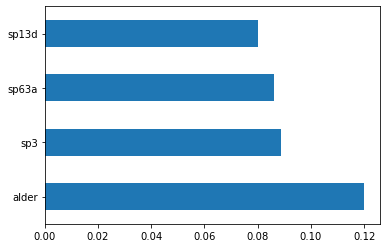

In [86]:
feat_importances = pd.Series(rf_clas.feature_importances_, index=x.columns)
feat_importances.nlargest(4).plot(kind='barh')

Ovenfor har jeg valgt de 4 vigtigste features i min random forest. Jeg kan også bare plotte det hele ved at sige:

<BarContainer object of 20 artists>

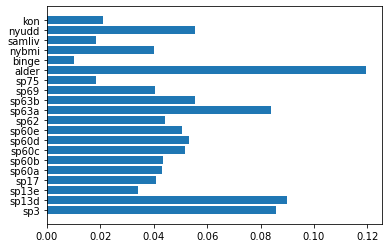

In [18]:
plt.barh(x.columns, rf_clas.feature_importances_)

Men det er afskyeligt fordi min graf ikke er sorteret efter høj til lav. Ad. Det kan vi fikse ved at sige:

Text(0.5, 1.0, 'Tilfældige skove og vigtighed')

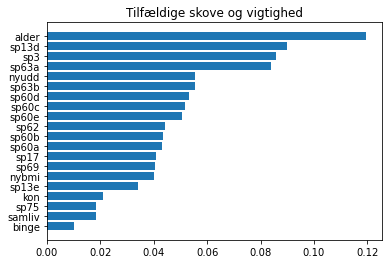

In [19]:
sorted = rf_clas.feature_importances_.argsort()
fig, ax = plt.subplots()
plt.barh(x.columns[sorted], rf_clas.feature_importances_[sorted])
ax.set_title("Tilfældige skove og vigtighed")

### Her til sidst!

Okay, så hvor god er random forest i forhold til f.eks. en logistisk regression? Vi er så heldige, at logistisk regression også sagtens kan bruges som en klassificeringsalgoritme i sklearn. Jeg bryder nu min egen regel og importerer noget til sidst (AAAAADDDD!) i en notebook:

In [87]:
from sklearn.linear_model import LogisticRegression

Logistisk regression i sklearn er rimelig ligetil. Vi definerer modellen først ved at gemme funktionen logistisk regression i "logit" for derefter at fitte den til vores data. Lige for nu ignorerer vi, hvad en "solver" er for noget.

In [92]:
logit = LogisticRegression(solver='liblinear')
logit.fit(x_train, y_train)
y_pred=logit.predict(x_test)
print("Accuracy: %0.3f" % metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.746


Til sidst kan vi printe præcision ligesom ved RF. Hvor godt kan vores logistiske regression "gætte" hvad udfaldet er i data, som den aldrig har set?

## ØVELSESTID!!!

Nu er det Jeres tur; brug enten jeres eget data eller brug data fra dagens forelæsning til at bygge jeres egen tilfældige skov. Det eneste i skal være opmærksomme på lige nu er:

* I skal have data af en hvis størrelse (helst +10K)
* I kan godt ignorere, at jeres udfaldskategorier ikke er lige store - det er altid interessant at ignorere :D
* I skal sikre jer, at jeres udfald er dikotomt - only dummies!